*SIO221a Notes - Alford and Gille*

*Reading: Bendat and Piersol, Ch. 3.1-3.4, Ch. 4

Concepts Covered: Standard error of the mean, Error propagation example, Central Limit Theorem, non-Gaussian distributions, the $\chi^2$ distribution.

# Lecture 4b

**Non-Gaussian distributions**

As we noted before, unsummed geophysical variables are often non-Gaussian.
We've talked about uniform distributions and double exponentials.
Here are some particularly important special cases.

We noted last time that the Rayleigh distribution is a good representation
for wind speed, which is necessarily positive.
It is defined from the square root of the sum of two independent
Gaussian components squared, $y=\sqrt{x_1^2 + x_2^2}$.

$$
p(y)=\frac{y}{\sigma^2} \exp{\left[-\frac{y^2}{2\sigma^2} \right]}.
$$

The more generic form of the Rayleigh distribution is the Weibull distribution (for positive x
only):

$$
p(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1} exp[ -\left(\frac{x}{\lambda}\right)^k]
$$

If $k = 2$ and $\lambda = \sqrt{2}\sigma$, this is the Rayleigh distribution. If $k = 1$, it represents a one-sided
exponential distribution.



Before we proceed, let's look at the answer to the coding assignment you just did.

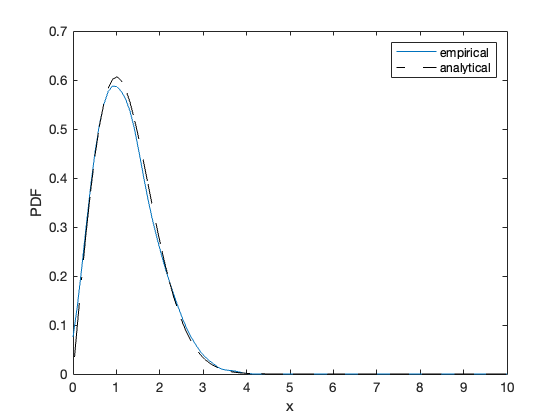

In [2]:
%Make a random variable that is the sum of n Gaussian variables.
n=2;
N=100;
sigma=1;
output_var=zeros(N,1);
for c=1:n
    output_var=output_var + sigma*randn(N,1).^2;
end


%Now take the square root:
rayleigh_var = sqrt(output_var);

% and compute the PDF:
vals=linspace(0,10,100);
rayleigh_analytical=vals./sigma.^2 .* exp(-vals.^2 ./ 2 ./ sigma^2);
pdf=ksdensity(rayleigh_var,vals);
plot(vals,pdf,vals,rayleigh_analytical,'k--')
legend('empirical','analytical')
ylabel('PDF')
xlabel('x')

The Rayleigh distribution brings us to the $\chi^2$ distribution, which is so important that we will spend extra time on it.

Suppose we define a variable:

$$
\chi_n^2 = z_1^2 + z_2^2 + z_3^2 + ... + z_n^2.\hspace{3cm} (18)
$$

Then $\chi_n^2$ is a random chi-square variable with $n$ degrees of freedom
(and $n$ is simply the number of independent elements that we sum.)
Then we can define a functional form for this:

$$
p(\chi_n^2) = \frac{1}{2^{n/2} \Gamma(n/2)} \exp\left(\frac{-\chi^2}{2}\right)
(\chi^2)^{(n/2)-1},\hspace{3cm} (19)
$$

where $\Gamma(n/2)$ is the gamma function (and this is a function that
you normally access through a look-up table or a function programmed
into Matlab, for example).
Lots of variables end up looking like $\chi^2$, so we'll use this a lot
to assess uncertainties.

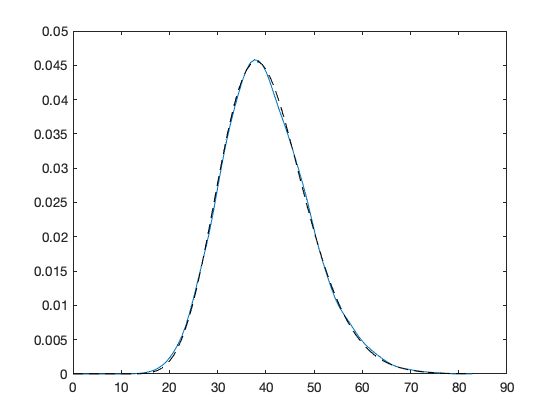

In [8]:
%%
%Now take n and look at the sum of the squares rather than the square root,
%to look at the chi2 distribution.

n=40;
N=10000;
sigma=1;
output_var=zeros(N,1);
for c=1:n
    output_var=output_var + sigma*randn(N,1).^2;
end

chi2var=output_var;
vals=linspace(0,max(chi2var),100);

pdf=ksdensity(chi2var,vals);
chi2_analytical = 1./2.^(n/2)./gamma(n/2).*exp(-vals/2).*vals.^(n/2-1);
%chi_mha=1./(2.^(n/2)*gamma(n/2))* vals.^(n/2-1).*exp(-vals./2);

%plot(vals,chi2_analytical,vals,chi_mha)
plot(vals,pdf,vals,chi2_analytical,'k--')


Let's notice a few things: 

1. The mean of a $\chi^2$ distribution is $n$; its standard deviation is $2n$.
2. As n (which we usually call the number of *degrees of freedom*) gets large, the $\chi^2$ distribution approaches a Gaussian, as we expect from the Central Limit theorem.
3. The $\chi^2$ distribution is a special case of the $\Gamma$ distribution; in turn, it has a special case for $n=2$ called an exponential distribution.

In [13]:
disp(['The mean is ' num2str(mean(chi2var))])
disp(['The variance is ' num2str(std(chi2var).^2)])



The mean is 39.9317
The variance is 81.558


The reason the $\chi^2$ distribution comes in so handy is because we often want to estimate the error on sums of squares.  For example, our spectral estimates we'll learn about soon are the sums of the squares of many Fourier coefficients, so we'll definitely use them in estimating errors on spectra.  

But also, consider energy: for example, the kinetic energy $E=1/2(u^2+v^2)$, where u and v are velocity components, should be expected to be a $\chi^2$ variable with 2 degrees of freedom.  We care a lot about energy, so it comes up a lot.  

Finally, we often want to estimate the mean square error, which is by definition a sum of squares.  We'll do this explicitly in the next lecture when we discuss hypothesis testing and distinguishing if PDFs are different from each other.